# 프로젝트 : 다양한 OCR모델 비교하기

In [1]:
# 라이브러리 버전 확인
import keras_ocr
import pytesseract
import os
import glob

import matplotlib.pyplot as plt
import matplotlib.image as img

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


## Step1. 검증용 데이터셋 준비





In [2]:
data_path = os.getenv('HOME')+'/aiffel/ocr_python/snack/'

In [3]:
images_path = glob.glob(data_path+"*.png")
images_path

['/aiffel/aiffel/ocr_python/snack/7.png',
 '/aiffel/aiffel/ocr_python/snack/2.png',
 '/aiffel/aiffel/ocr_python/snack/1.png',
 '/aiffel/aiffel/ocr_python/snack/5.png',
 '/aiffel/aiffel/ocr_python/snack/9.png',
 '/aiffel/aiffel/ocr_python/snack/3.png',
 '/aiffel/aiffel/ocr_python/snack/8.png',
 '/aiffel/aiffel/ocr_python/snack/10.png',
 '/aiffel/aiffel/ocr_python/snack/6.png',
 '/aiffel/aiffel/ocr_python/snack/4.png']

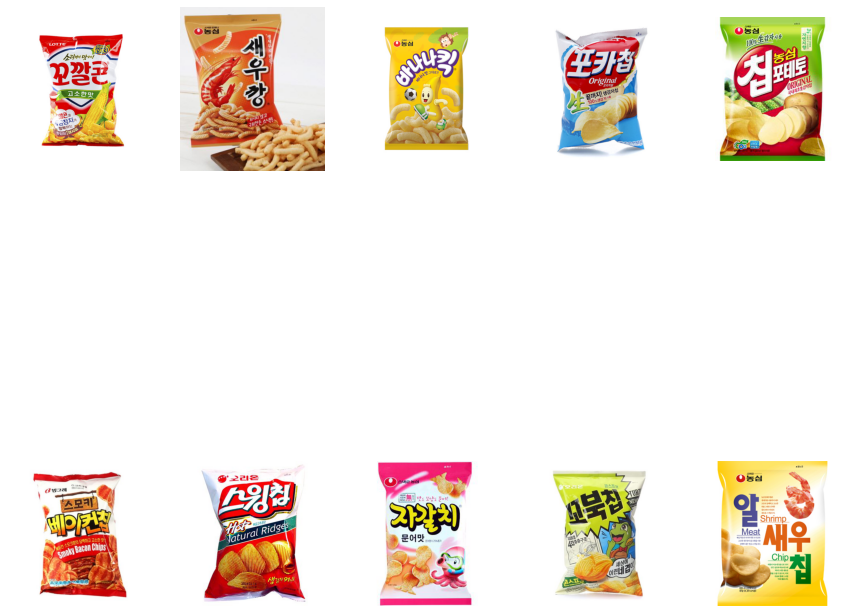

In [4]:
plt.figure(figsize=(15, 15))

for i, image in enumerate(images_path,1):
    plt.subplot(2, 5, i)
    plt.imshow(img.imread(image))
    plt.axis('off')

## API 사용 테스트

### 구글의 파이썬 API 인터페이스 모듈을 아래와 설치합니다.

$ pip install --upgrade google-api-python-client
 
$ pip install google-cloud-vision

### Google Cloud Vision API 사용

아래 링크의 설명을 참고하여 서비스 계정 및 인증키를 생성합니다. 브라우저에서 다운로드한 인증키는 my_google_api_key.json이라는 파일명으로 변경합시다. (파일은 프로젝트 이름으로 시작하는 파일명으로 자동 저장됩니다.)

https://kimchangheon.tistory.com/166

cloud jupyter를 열고 my_google_api_key.json 파일을 ~/aiffel/ocr_python 디렉터리에 업로드해 주세요

In [5]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
        print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [6]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

for path in images_path:
    detect_text(path)

total 107704
-rw-r--r-- 1 root root    20917 Jan 12 13:48 'cat&dog.ipynb'
-rw-r--r-- 1 root root  1437301 Jan 14 14:06  decistion-tree.png
-rw-r--r-- 1 root root     4682 Jan 10 06:23  dice.ipynb
-rw-r--r-- 1 root root   245263 Jan 14 01:45 '[E-01]RockPaperScissor.ipynb'
-rw-r--r-- 1 root root  5555881 Jan 14 14:16 '[E-02]digits.ipynb'
-rw-r--r-- 1 root root  1850619 Jan 18 14:48 '[E-03]whisker.ipynb'
-rw-r--r-- 1 root root   116688 Jan 20 14:27 '[E-04]lyrics.ipynb'
-rw-r--r-- 1 root root    69114 Jan 20 14:32 '[E-04]testfile.ipynb'
-rw-r--r-- 1 root root   668002 Jan 25 08:13 '[E-05]kaggle.ipynb'
-rw-r--r-- 1 root root   543399 Jan 25 07:23 '[E-05]test.ipynb'
-rw-r--r-- 1 root root   339126 Jan 27 13:03 '[E-06]movie.ipynb'
-rw-r--r-- 1 root root    12371 Jan 27 06:37 '[E-06]test.ipynb'
-rw-r--r-- 1 root root  7503641 Feb 11 06:46 '[E-07]MakePictures.ipynb'
-rw-r--r-- 1 root root  1649176 Feb  3 07:33 '[E-07]person.ipynb'
-rw-r--r-- 1 root root    34063 Feb  3 07:00 '[E-07]test.ipynb'


## keras-ocr 써보기

In [7]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [8]:
images = [keras_ocr.tools.read(im) for im in images_path]
predictions = [pipeline.recognize([im]) for im in images_path]

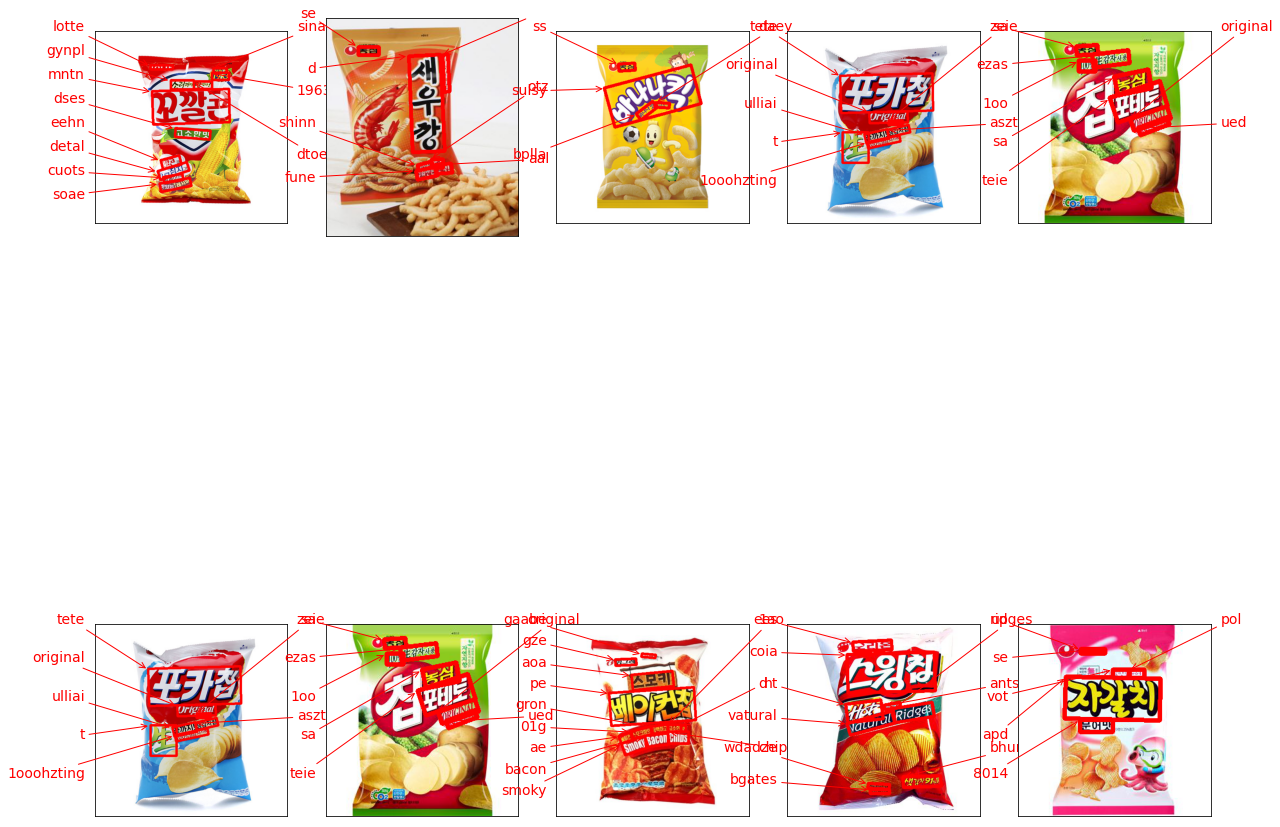

In [9]:
# Plot the predictions
fig, axs = plt.subplots(2, 5 , figsize=(20, 20))
for a in range(len(axs)):
    for b in range(len(axs[a])):
        keras_ocr.tools.drawAnnotations(image=images[3*a+b], 
                                    predictions=predictions[3*a+b][0], ax=axs[a,b])

## 테서랙트 써보기

테서랙트 테스트 이미지

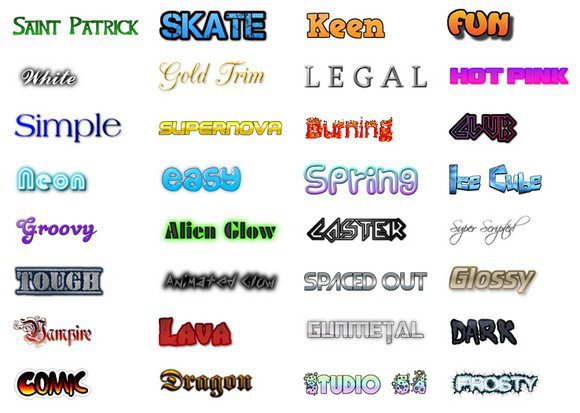

### 테서랙트 설치하기

$ sudo apt install tesseract-ocr

$ sudo apt install libtesseract-dev

### 테서랙트 파이썬 wrapper 설치하기

Pytesseract는 OS에 설치된 테서랙트를 파이썬에서 쉽게 사용할 수 있도록 해주는 래퍼 라이브러리(wrapper library)입니다. 파이썬 내에서 컴퓨터에 설치된 테서랙트 엔진의 기능을 바로 쓸 수 있도록 해줍니다.

https://pypi.org/project/pytesseract/

설치 확인  $ pip list | grep pytesseract

In [10]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/test_image.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png
/aiffel/aiffel/ocr_python/0016.png
/aiffel/aiffel/ocr_python/0017.png
/aiffel/aiffel/ocr_python/0018.png
/aiffel/aiffel/ocr_python/0019.png
/aiffel/aiffel/ocr_python/0020.png
/aiffel/aiffel/ocr_python/0021.png
/aiffel/aiffel/ocr_python/0022.png
/aiffel/aiffel/ocr_python/0023.png
/aiffel/aiffel/ocr_python/0024.png
/aiffel/aiffel/ocr_python/0025.png
/aiffel/aiffel/ocr_python/0026.png
/aiffel/aiffel/ocr_python/0027.png
/aiffel/aiffel/ocr_p

In [11]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

SAI

PATRI

SKATE

Keen

309)

Nite.

Simple

a

Gold .

Trim

LEGAL

HOT


rhs Yemmteaed jg ey Jae

Birhing

AUB

@36éy

he

Gus



& 26) Svisls

Are

“OFC

OME) Ce

COATS) OCU

GIOSS 4


SLADUUUULS jl AL

DARK

Dragon

STUDIO)

8

|

Done


# 결론 및 회고

구글 api는 영어도 잘되고 한글은 물론 한자까지 잘 나오는것을 확인할수 있었다. keras-ocr은 영어는 잘 나왔지만 한글을 불러오지 못하였음. 테서랙트에도 과자이미지로 하려고 하였으나 방법을 찾을수 없어 영어들로 구성된 이미지를 새로 찾아서 진행하였음. 영어를 잘 불러오는것 같았으나 글자체가 좀 헷갈리는 부분에서는 올바른 글자를 불러올수 없었다. 아무래도 구글이라는 큰회사에서 만든 api가 성능이 아주 좋은것을 알수 있었으면 사용법도 가장 쉬워보인다.